# Стратегия взаимодействия с пользователями в фитнес-центре

Задача: проанализирвоать информацию о клиентах сети фитнес-клубов и подготовить план действий по поддержанию их лояльности.

### Загрузка и первичный анализ данных

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
df.to_csv('df.csv')

In [4]:
df

gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0          1              1        1              1      0                6   
1          0              1        0              0      1               12   
2          0              1        1              0      1                1   
3          0              1        1              1      1               12   
4          1              1        1              1      1                1   
...      ...            ...      ...            ...    ...              ...   
3995       1              1        1              0      1               12   
3996       0              1        0              0      1                1   
3997       1              1        1              1      1               12   
3998       0              1        1              1      1                6   
3999       1              0        1              0      0               12   

      Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0                1   29                     14.227470                    5.0   
1                1   31                    113.202938                   12.0   
2                0   28                    129.448479                    1.0   
3                1   33                     62.669863                   12.0   
4                0   26                    198.362265                    1.0   
...            ...  ...                           ...                    ...   
3995             0   33                      2.406023                   12.0   
3996             1   29                     68.883764                    1.0   
3997             0   28                     78.250542                   11.0   
3998             0   32                     61.912657                    5.0   
3999             1   30                    178.861814                   12.0   

      Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0            3                   0.020398                           0.000000   
1            7                   1.922936                           1.910244   
2            2                   1.859098                           1.736502   
3            2                   3.205633                           3.357215   
4            3                   1.113884                           1.120078   
...        ...                        ...                                ...   
3995         8                   2.284497                           2.349070   
3996         1                   1.277168                           0.292859   
3997         2                   2.786146                           2.831439   
3998         3                   1.630108                           1.596237   
3999         1                   1.101832                           1.035270   

      Churn  
0         0  
1         0  
2         0  
3         0  
4         0  
...     ...  
3995      0  
3996      1  
3997      0  
3998      0  
3999      0  

[4000 rows x 14 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


Пропусков в данных нет. Для удобства приведем названия всех столбцов к нижнему регистру. 

In [6]:
df.columns = df.columns.str.lower()

In [7]:
display(df.groupby('contract_period')['age'].count())
df.describe()

contract_period
1     2207
6      833
12     960
Name: age, dtype: int64

gender  near_location      partner  promo_friends        phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       contract_period  group_visits          age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.000000    27.000000   
50%           1.000000      0.000000    29.000000   
75%           6.000000      1.000000    31.000000   
max          12.000000      1.000000    41.000000   

       avg_additional_charges_total  month_to_end_contract     lifetime  \
count                   4000.000000            4000.000000  4000.000000   
mean                     146.943728               4.322750     3.724750   
std                       96.355602               4.191297     3.749267   
min                        0.148205               1.000000     0.000000   
25%                       68.868830               1.000000     1.000000   
50%                      136.220159               1.000000     3.000000   
75%                      210.949625               6.000000     5.000000   
max                      552.590740              12.000000    31.000000   

       avg_class_frequency_total  avg_class_frequency_current_month  \
count                4000.000000                        4000.000000   
mean                    1.879020                           1.767052   
std                     0.972245                           1.052906   
min                     0.000000                           0.000000   
25%                     1.180875                           0.963003   
50%                     1.832768                           1.719574   
75%                     2.536078                           2.510336   
max                     6.023668                           6.146783   

             churn  
count  4000.000000  
mean      0.265250  
std       0.441521  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

Выбросов не видно, но есть странности. У части клиентов, купивших 12-месячный абонемент, в колонке с числом месяцев до конца активного абонемента указано '13'. Это может быть какой-то бонус или результат заморозки абонемента, а может быть ошибка в данных. Как бы там ни было, достаточных оснований править эти странные значения нет, оставим как есть.

В датасете представлены абонементы длительностью 1, 6 или 12 месяцев. Из описания известно, что бывают еще трехмесячные, но их видимо никто в выборке не купил. Из всех возможных абонементов клиенты "Культуриста-Датасаентиста" предпочитают самые короткие.

Средний возраст клиентов клуба -- 29 лет. Каждый в среднем приносит ему по 147 рублей выручки от побочных услуг в месяц. Средний срок сотрудничества клиентов с клубом составляет около 4 месяцев.

### Факторный анализ

Посмотрим на взаимосвязи признаков, чтобы понять, какие из них наиболее значимы, а остальные отсеять.

Для каждого признака найдем два средних. Затем, чтобы в первом приближении понять, какие признаки могут быть значимы, для каждого количественного признака построим два распределения -- отдельно по тем, кто перестал ходить в клуб, и тем, что не перестал, а для каждого категориального признака по тому же принципу выведем две столбчатых диаграммы.

gender  near_location   partner  promo_friends     phone  \
churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       contract_period  group_visits        age  avg_additional_charges_total  \
churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       month_to_end_contract  lifetime  avg_class_frequency_total  \
churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       avg_class_frequency_current_month  
churn                                     
0                               2.027882  
1                               1.044546

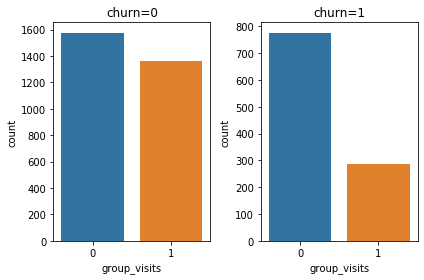

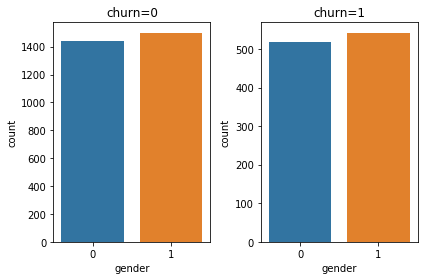

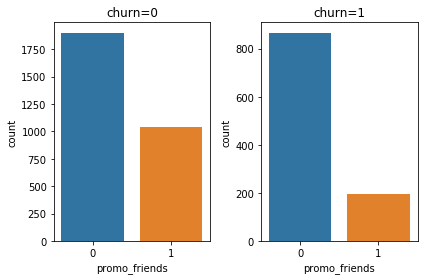

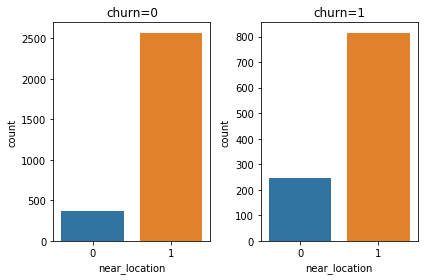

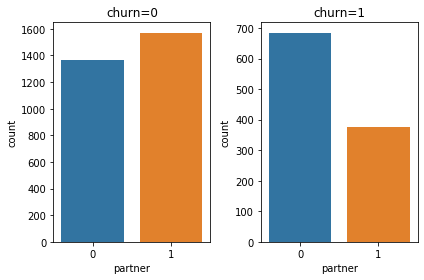

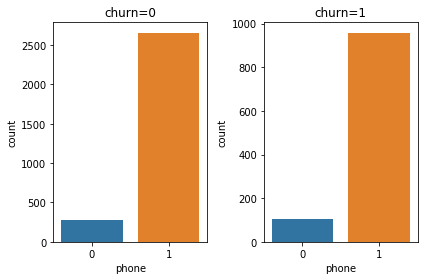

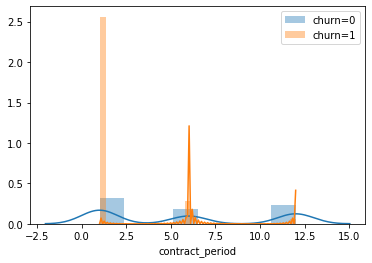

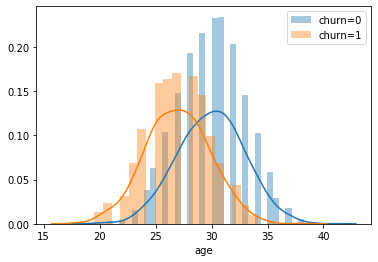

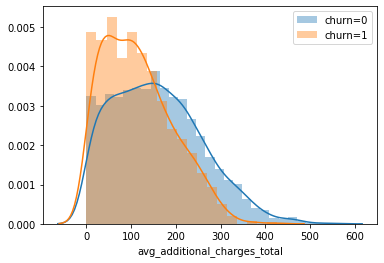

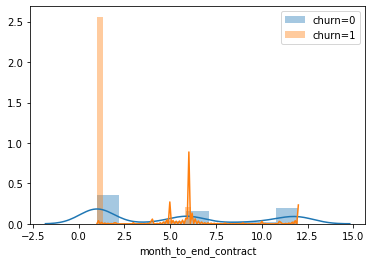

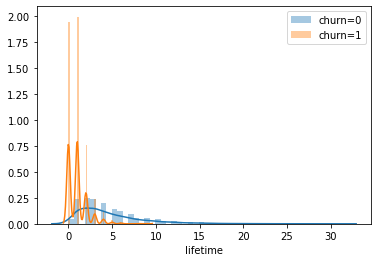

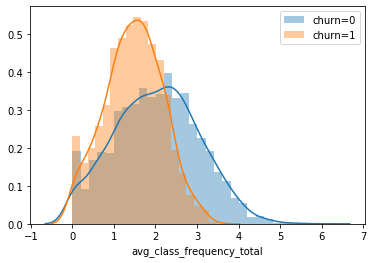

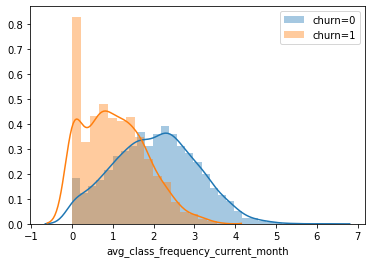

In [8]:
quant = ['contract_period', 
         'age', 
         'avg_additional_charges_total', 
         'month_to_end_contract',
         'lifetime',
         'avg_class_frequency_total', 
         'avg_class_frequency_current_month']

cat = list(set(df.columns) - set(quant))

display(df.groupby('churn')[df.columns[0:13]].mean())

for col in cat:
    if col != 'churn':
        counter=1
        for choice in df.churn.unique():
            plt.subplot(1, 2, counter)
            plt.title('churn=' + str(choice))
            sns.countplot(df.query('churn == @choice')[col])
            counter+=1
        plt.tight_layout()
        plt.show()
        
for col in quant:
    for choice in df.churn.unique():
        sns.distplot(df.query('churn == @choice')[col], label='churn=' + str(choice))
    legend = plt.legend()
    plt.show()

Среди тех, кто участвует в партнерской программе, пришел в клуб по совету знакомых и/или посещает групповые занятия, заметно больше людей, которые помечены как не участвующие в оттоке. Близость места жительства или работы к клубу показывает более слабую корреляцию. Пол клиента и оставленный или неоставленный им номер телефона с оттоком, скорее всего, никак не связаны.

Кроме того, для ушедших клиентов характерны более молодой возраст и несколько менее высокие дополнительные траты в клубе.

По времени до окончания текущего контракта выделяются те, у кого он истекает через 2 месяца -- почему-то эта группа клиентов более склонна к оттоку. С другой стороны, если клиент не ушел на нулевом и первом лайфтаймах, дальше шансы потерять его заметно снижаются.

Из графиков распределения по среднему количеству посещенных занятий в неделю (за последний месяц и за все время) видно, что те, у кого этот показатель превышает 3, уходят реже. Таблица средних показывает, что у тех, кого клуб потерял, в предшествующем месяце несколько снизилась частота посещений -- на 0,43 раза в неделю.

Вычислим коэффициенты корреляции Пирсона для всех возможных сочетаний признаков.

In [9]:
df.corr()

gender  near_location   partner  \
gender                             1.000000       0.006699 -0.010463   
near_location                      0.006699       1.000000 -0.005119   
partner                           -0.010463      -0.005119  1.000000   
promo_friends                     -0.005033       0.210964  0.451960   
phone                             -0.008542      -0.015763  0.009970   
contract_period                    0.000502       0.150233  0.306166   
group_visits                       0.017879       0.154728  0.022710   
age                                0.013807       0.058358  0.047480   
avg_additional_charges_total      -0.009334       0.040761  0.022941   
month_to_end_contract             -0.001281       0.143961  0.294632   
lifetime                           0.013579       0.070921  0.061229   
avg_class_frequency_total          0.014620       0.043127  0.024938   
avg_class_frequency_current_month  0.009156       0.062664  0.045561   
churn                              0.000708      -0.128098 -0.157986   

                                   promo_friends     phone  contract_period  \
gender                                 -0.005033 -0.008542         0.000502   
near_location                           0.210964 -0.015763         0.150233   
partner                                 0.451960  0.009970         0.306166   
promo_friends                           1.000000  0.001982         0.244552   
phone                                   0.001982  1.000000        -0.006893   
contract_period                         0.244552 -0.006893         1.000000   
group_visits                            0.120170 -0.010099         0.169991   
age                                     0.050113 -0.011403         0.138249   
avg_additional_charges_total            0.036898  0.009279         0.111445   
month_to_end_contract                   0.239553 -0.011196         0.973064   
lifetime                                0.072721 -0.018801         0.170725   
avg_class_frequency_total               0.028063  0.008340         0.096211   
avg_class_frequency_current_month       0.053768  0.013375         0.159407   
churn                                  -0.162233 -0.001177        -0.389984   

                                   group_visits       age  \
gender                                 0.017879  0.013807   
near_location                          0.154728  0.058358   
partner                                0.022710  0.047480   
promo_friends                          0.120170  0.050113   
phone                                 -0.010099 -0.011403   
contract_period                        0.169991  0.138249   
group_visits                           1.000000  0.080934   
age                                    0.080934  1.000000   
avg_additional_charges_total           0.032079  0.080240   
month_to_end_contract                  0.163703  0.134511   
lifetime                               0.075853  0.164693   
avg_class_frequency_total              0.056695  0.119953   
avg_class_frequency_current_month      0.075923  0.183095   
churn                                 -0.175325 -0.404735   

                                   avg_additional_charges_total  \
gender                                                -0.009334   
near_location                                          0.040761   
partner                                                0.022941   
promo_friends                                          0.036898   
phone                                                  0.009279   
contract_period                                        0.111445   
group_visits                                           0.032079   
age                                                    0.080240   
avg_additional_charges_total                           1.000000   
month_to_end_contract                                  0.113958   
lifetime                                               0.079028   
avg_class_frequency_total                         

Матрица корреляций подтверждает выводы, полученные из пердыдущих таблицы и графиков, но кроме того помогает ранжировать признаки по силе связи с целевым признаком. Сильнее всего с оттоком связан лайфтайм (0,43), на втором месте возраст (0,4) и средняя частота посещений за предыдущий месяц (0,41), на третьем -- длительность абонемента (0,38) и количество времени до его истечения (0,38).

Интересно изучить и остальные столбцы, которые характеризуют связь между признаками. Положительную связь между `partner` и `contract_period` (0,3) можно трактовать как свидетельство того, что партнерские программы косвенно способствуют удержанию клиентов (при этом связь признака `partner` напрямую с `churn` довольно слаба -- 0,15). Корреляция `partner` и `promo_friends` (0,45) может говорить о том, что люди, пришедшие в клуб по совету знакомых, потом часто привлекают к партнерству своего работодателя.

Итак, можно было бы ради экономии вычислительных ресурсов учить модель только на пяти признаках, показавших самую высокую корреляцию с оттоком. Поскольку данных у нас немного, исключать незначимые признаки не будем.

### Модель прогнозирования оттока пользователей

Целевой признак (факт оттока пользователей) в нашем датасете -- это `churn`. Значениями в этом столбце все данные в таблице уже фактически разделены на два класса.

Разобъем данные на обучающую и валидационную выборки. Размер валидационной выборки примем равным 25%.

In [10]:
df_train, df_valid = train_test_split(df, test_size=0.25, random_state=12345)

Определим признаки и цели отдельно для тренировочной и валидационной выборок.

In [11]:
features_train = df_train.drop('churn', axis=1)
target_train = df_train['churn']

features_valid = df_valid.drop('churn', axis=1)
target_valid = df_valid['churn']

Теперь обучим две модели (логистической регрессии и случайного леса) и оценим их качество с помощью метрик `accuracy`, `precision` и `recall`. 

Если придется выбирать между последними двумя, нужно будет принимать решение в зависимости от того, какие меры по удержанию клиентов планирует принимать компания. Логично предположить, что клиентам, попавшим в зону риска, предложат какие-то скидки или бонусы. Если маркетологи скажут, что лучше удержать мало клиентов, но наверняка, то есть бюджет в пересчете на одного клиента будет относительно велик, лучше сосредоточиться на избежании ложнопозитивных результатов и стремиться к более высокой `precision`. Если наборот, то будем смотреть в первую очередь на `recall`.

Начнем с модели случайного леса. 

Сначала переберем разные значения гиперпараметра `n_estimators` (количество деревьев в случайном лесу), чтобы понять, какое даст наилучшие результаты.

In [12]:
accuracy = pd.DataFrame(columns=['acc', 'prec', 'rec'])
for i in range(2, 50, 2):
    model = RandomForestClassifier(random_state=12345, n_estimators=i)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    accuracy.loc[i] = [accuracy_score(target_valid, predictions_valid),
                       precision_score(target_valid, predictions_valid),
                       recall_score(target_valid, predictions_valid)]

print('Вариант с самой высокой accuracy:')
display(accuracy.loc[accuracy.acc == accuracy.acc.max()])
print()
print('Вариант с самой высокой precision:')
display(accuracy.loc[accuracy.prec == accuracy.prec.max()])
print()
print('Вариант с самим высоким recall:')
display(accuracy.loc[accuracy.rec == accuracy.rec.max()])
print()

Вариант с самой высокой accuracy:


acc      prec      rec
42  0.917  0.865306  0.80916


Вариант с самой высокой precision:


acc      prec       rec
4  0.899  0.881517  0.709924


Вариант с самим высоким recall:


acc      prec       rec
40  0.915  0.855422  0.812977

Обучать модель с 4 деревьями не стоит, слишком мало значение `recall`. Из двух оставшихся вариантов в общем случае лучше выборать второй (с 40 деревьями), т.к. с ним выигрыш в `recall` будет больше, чем проигрыш в `accuracy`. Итак, обучим модель с 40 деревьями.

In [13]:
forest_model = RandomForestClassifier(random_state=12345, n_estimators=40)
forest_model.fit(features_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

Теперь обучим модель логистической регрессии и оценим ее метрики.

In [14]:
# модель логистической регрессии
log_reg_model = LogisticRegression(random_state=12345)

# обучение модели
log_reg_model.fit(features_train, target_train)

# получение предсказания
predictions_valid = log_reg_model.predict(features_valid)

# оценка качества предсказания
print('Accuracy score: ', accuracy_score(target_valid, predictions_valid))
print('Precision score: ', precision_score(target_valid, predictions_valid))
print('Recall score: ', recall_score(target_valid, predictions_valid))

Accuracy score:  0.922
Precision score:  0.868
Recall score:  0.8282442748091603


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Без дополнительных подстроек логистическая регрессия обошла наилучшую из конфигураций случайного леса, предпочтение стоит отдать ей. 

Можно еще улучшить качество этой модели, перебрав гиперпараметры с помощью `GridSearchCV`.

In [15]:
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
class_weight = [{1:0.5, 0:0.5}, 
                {1:0.4, 0:0.6}, 
                {1:0.6, 0:0.4}, 
                {1:0.7, 0:0.3}, 
                {1:0.3, 0:0.7}]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight,
                  solver=solver)

for param in ['accuracy', 'precision', 'recall']:
    
    grid = GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
                    param_grid=param_grid,
                    scoring=['accuracy', 'precision', 'recall'],
                    verbose=1,
                    n_jobs=-1,
                    refit=param)
    grid_result = grid.fit(features_train, target_train)
    print(param)
    print('Best Score: ', grid_result.best_score_)
    print('Best Params: ', grid_result.best_params_)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn

accuracy
Best Score:  0.931
Best Params:  {'C': 100, 'class_weight': {1: 0.4, 0: 0.6}, 'penalty': 'l1', 'solver': 'liblinear'}
Fitting 3 folds for each of 160 candidates, totalling 480 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn

precision
Best Score:  0.952622229003521
Best Params:  {'C': 1, 'class_weight': {1: 0.3, 0: 0.7}, 'penalty': 'l2', 'solver': 'liblinear'}
Fitting 3 folds for each of 160 candidates, totalling 480 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn

recall
Best Score:  0.9123662104699952
Best Params:  {'C': 1, 'class_weight': {1: 0.7, 0: 0.3}, 'penalty': 'l1', 'solver': 'liblinear'}


accuracy

Best Score:  0.9306666666666666

Best Params:  {'C': 10, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l2', 'solver': 'liblinear'}

precision

Best Score:  0.9548582429314588

Best Params:  {'C': 1, 'class_weight': {1: 0.3, 0: 0.7}, 'penalty': 'l2', 'solver': 'liblinear'}

recall

Best Score:  0.9111152694470258

Best Params:  {'C': 10, 'class_weight': {1: 0.7, 0: 0.3}, 'penalty': 'l1', 'solver': 'liblinear'}

Сделать модель еще лучше можно с помощью метрики `f1`, которая представляет собой гармоническое среднее `precision` и `recall`.

### Кластеризация пользователей

Применим два метода машинного обучения без учителя, чтобы выделить кластеры клиентов. Имея такое разбиение, будет проще выбрать методы борьбы с оттоком.

Начнем с иерархической кластеризации.

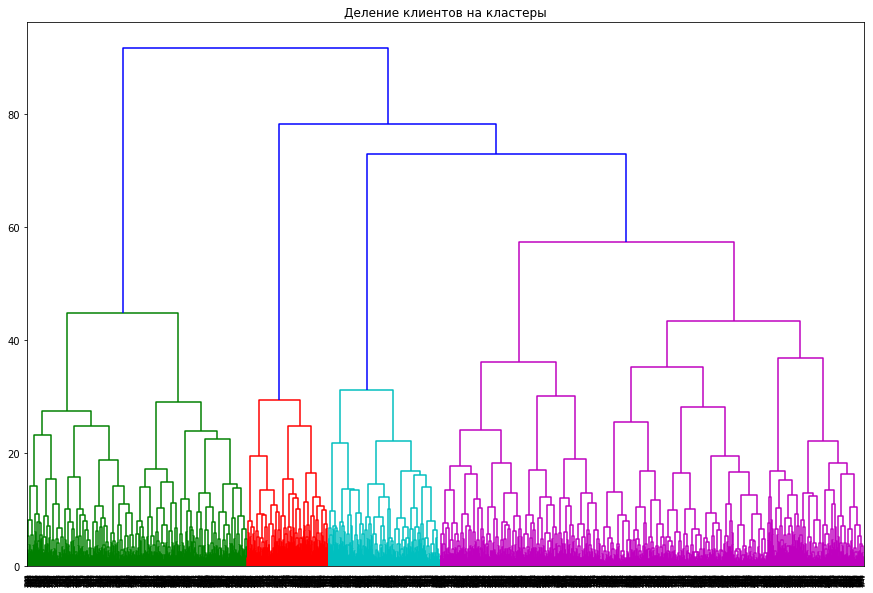

In [16]:
# стандартизация данных
scaler = StandardScaler()
features_train_stadartized = scaler.fit_transform(features_train)

# построение таблицы связок между объектами
linked = linkage(features_train_stadartized, method = 'ward')

# построение дендрограммы
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Деление клиентов на кластеры')
plt.show()

На дендрограмме явно видны 4 кластера.

Теперь посмотрим, что даст метод к-средних. Исходя из результатов иерархической кластеризации, делить клиентов будем на 4 кластера.

In [17]:
km = KMeans(n_clusters=4, random_state=1807999)
labels = km.fit_predict(features_train_stadartized)

df_train['cluster_km'] = labels

df_train_grouped = df_train.groupby('cluster_km')[list(df_train.drop('cluster_km', axis=1).columns)].mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Сравним средние значения признаков по кластерами со средними по датасету в целом, а кроме того посмотрим на распределения полиномиальных признаков в зависимости от кластера.

In [18]:
display(df_train_grouped)
display(df.describe().loc['mean'])

gender  near_location   partner  promo_friends  phone  \
cluster_km                                                            
0           0.529210       0.872852  0.481100       0.292096    0.0   
1           0.473310       0.761566  0.386121       0.191281    1.0   
2           0.557717       0.874189  0.337224       0.212711    1.0   
3           0.497543       0.942260  0.777641       0.558968    1.0   

            contract_period  group_visits        age  \
cluster_km                                             
0                  4.591065      0.439863  29.326460   
1                  1.852313      0.286477  28.066726   
2                  2.391699      0.476005  29.977951   
3                 10.732187      0.531941  29.829238   

            avg_additional_charges_total  month_to_end_contract  lifetime  \
cluster_km                                                                  
0                             143.063370               4.309278  4.264605   
1                             130.048310               1.774021  2.252669   
2                             160.043537               2.226978  4.897536   
3                             161.505638               9.782555  4.664619   

            avg_class_frequency_total  avg_class_frequency_current_month  \
cluster_km                                                                 
0                            1.839087                           1.703397   
1                            1.214981                           0.958355   
2                            2.711393                           2.695866   
3                            1.984459                           1.981004   

               churn  
cluster_km            
0           0.257732  
1           0.558719  
2           0.094682  
3           0.028256

gender                                 0.510250
near_location                          0.845250
partner                                0.486750
promo_friends                          0.308500
phone                                  0.903500
contract_period                        4.681250
group_visits                           0.412250
age                                   29.184250
avg_additional_charges_total         146.943728
month_to_end_contract                  4.322750
lifetime                               3.724750
avg_class_frequency_total              1.879020
avg_class_frequency_current_month      1.767052
churn                                  0.265250
Name: mean, dtype: float64

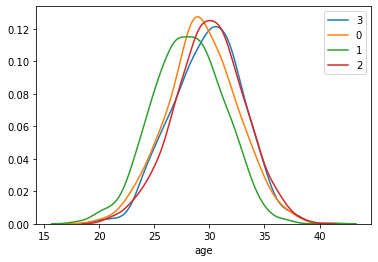

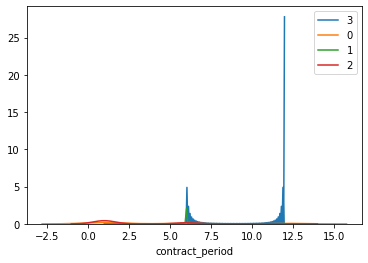

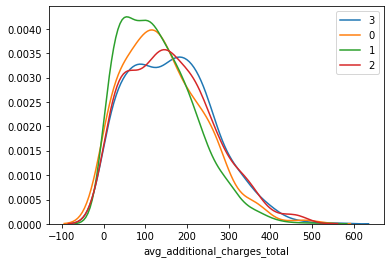

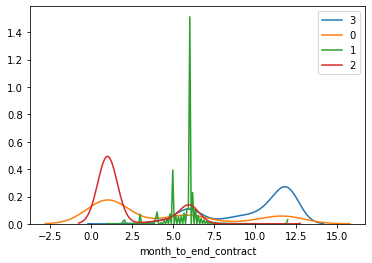

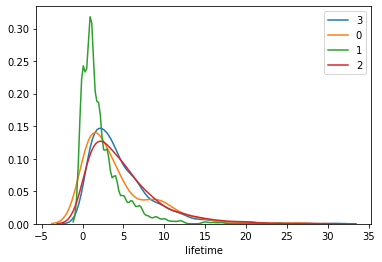

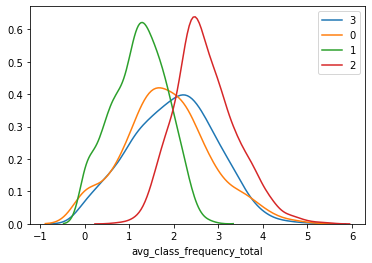

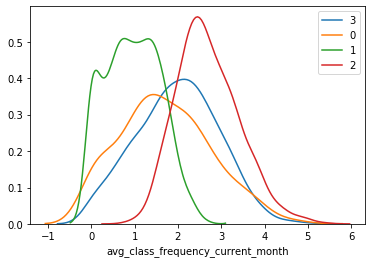

In [19]:
for param in ['age', 'contract_period', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 
              'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    for cluster in df_train.cluster_km.unique():
        sns.distplot(df_train.query('cluster_km == @cluster')[param], hist=False, label=cluster)
    legend = plt.legend()
    plt.show()

По возрасту на общем фоне выделяется кластер 1: там преобладают чуть более молодые люди, чем в трех остальных.

По распределению полов кластер 3 близок к генеральной совокупности. Есть два "зеркальных" кластера (1, 2) с заметным преобладанием каждого из двух полов и еще один (0), где пол "1" имеет незначительное преимущество.

Разделение по близости места жительства/работы к клубу выглядит следующим образом: два кластера со средним значением этого праметра чуть выше, чем по датасету в целом, и два полярных кластера: в одном собрались люди из условной "ближней" зоны (3), в другом -- из "дальней" (1).

Явно заметен кластер, вобравший в себя большинство участников партнерских программ и тех, кто впервые пришел в клуб по совету знакомых (3). Еще в одном средние значения этих признаков не отличаются от средних по датасету (0), а в двух клиентов с этими двумя признаками меньше. Раньше мы уже обращали внимание на высокую корреляцию признаков `partner` и `promo_friends`, так что такое соседство не случайно.

Так же распределились кластеры и по признаку `contract_period` (как мы выяснили, этот признак имеет высокую корреляцию с `partner`).

Очень интересная картина с параметром `phone`: все без исключения клиенты клуба, которые не оставили свой номер, собрались в одном кластере (0).

На групповые занятия заметно чаще, чем в среднем по датасету, ходят участники корпоративных программ. Еще есть один кластер, который по этому признаку сильно отстает, а два других посещают групповые занятия чуть чаще среднего.

По дополнительным расходам кластеры разделились поровну: в двух кластерах клиенты тратят значительно больше среднего, в двух других -- чуть меньше и значительно меньше среднего.

Закомерно, что кластер с относительно невысоким `contract_period` вобрал в себя клиентов со сравнительно низким значением лайфтайма: в этом кластере большая текучка. У тех же людей больше всего различается средняя частота посещений за все время и в текущем месяце. Впрочем, и то, и другое близко к единице.

То, что мы видим в колонке `churn`, интуитивно понятно: клиенты из двух кластеров в целом никуда не собираются, еще один кластер всерьез задумался, а последний скорее уходит, чем остается.

Интересно, сколько клиентов попало в каждый кластер?

In [20]:
df_train.groupby('cluster_km')['gender'].count()

cluster_km
0     291
1    1124
2     771
3     814
Name: gender, dtype: int64

Если судить по обучающей выборке, почти половина клиентов не очень-то лояльны клубу. Хорошая новость в том, что такая картина складывается главным образом из-за большого притока новых пользователей (как видно по графику распределения лайфтаймов, первый кластер самый "молодой").

### Выводы и рекомендации

В кластере 3 модель собрала самых лояльных клубу клиентов, ядро его аудитории, которое покупает длительные абонементы, приносит наибольший побочный доход и активнее всего участвует в мероприятиях клуба. Похоже, тут никаких дополнительных мер по удержанию клиентов не требуется. 

Кластер 2 -- это люди с деньгами, но не "свои". Вероятно, это те, на ком клуб лучше всего зарабатывает, ведь они купили свои абонементы не по акции, а за полную цену. Показатель оттока в этой категории чуть выше, чем у "ядра", но все равно очень низкий -- меньше 10%, так что тратить деньги на их удержание в принципе не обязательно. Зато через них можно пытаться привлекать новых клиентов, если предложить им подключить своих работодателей к партнерской программе (как мы видели, доля участников таких программ в этом кластере ниже среднего).

Чуть меньше трети клиентов клуба размышляют о том, чтобы уйти (кластеры 0 и 1). 

Кластер 0 -- это среднестатистические посетители, которые тратят в клубе чуть меньше среднего и берегут свои личные данные, при этом среди них довольно высок процент оттока. Им стоит предлагать скидки и льготные условия. Особенно важно делать это в течение первых двух лайфтаймов и ближе к концу срока действия их абонементов. Чего делать точно не нужно, так это требовать от них оставлять номер телефона -- придется обойтись рекламой в клубе и, возможно, таргетированной рекламой в интернете.

Самым рискованным с точки зрения оттока в классическом понимании выглядит кластер 1: эти люди не слишком связаны с клубом -- ни географией, ни деловыми или личными контактами. Мало кто из них тренируется в клубе больше одного раза в неделю, они тратят мало денег. При этом это самый многочисленный кластер -- больше трети клиентов.

Возможно, эти люди часто ездят в командировки, привыкли к спонтанным тренировкам или по другим причинам не хотят привязываться к единственному клубу. Есть предположение, что в случае с ними стандартная метрика оттока может быть попросту не релевантной.

На эту группу клиентов стоит смотреть как на одного собирательного "макроклиента", чьи потребности отличаются от потребностей обычных клиентов. Чтобы привлечь эту категорию людей, можно, например, заключить партнерское соглашение с другими клубами или с аггрегаторами, чтобы фактически увеличить свою сеть, или снизить для них порог входа: возможно, они не купят абонемент, но будут готовы заплатить за разовый вход, особенно если в цену будут включены полотенце и тапочки (легким на подъем людям носить их с собой неудобно).